## Question 1: Extracting Tesla Stock Data Using yfinance


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Fetch Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
html = response.text

# Parse HTML and find the quarterly revenue table
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', class_='historical_data_table table')

# Extract data from table
data = []
for row in table.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        if revenue != '':
            data.append([date, revenue])

# Create DataFrame
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'])

# Display last 5 rows
tesla_revenue.tail()


,Date,Revenue
11,2013,2013
12,2012,413
13,2011,204
14,2010,117
15,2009,112


## Question 3: Extracting GameStop Stock Data Using yfinance

In [4]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Webscraping

In [5]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
html = response.text

# Parse HTML and find the quarterly revenue table
soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', class_='historical_data_table table')

# Extract data from table
data = []
for row in table.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        if revenue != '':
            data.append([date, revenue])

# Create DataFrame
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Display last 5 rows
gme_revenue.tail()

,Date,Revenue
12,2013,8887
13,2012,9551
14,2011,9474
15,2010,9078
16,2009,8806


## Question 5: Plot Tesla Stock Graph

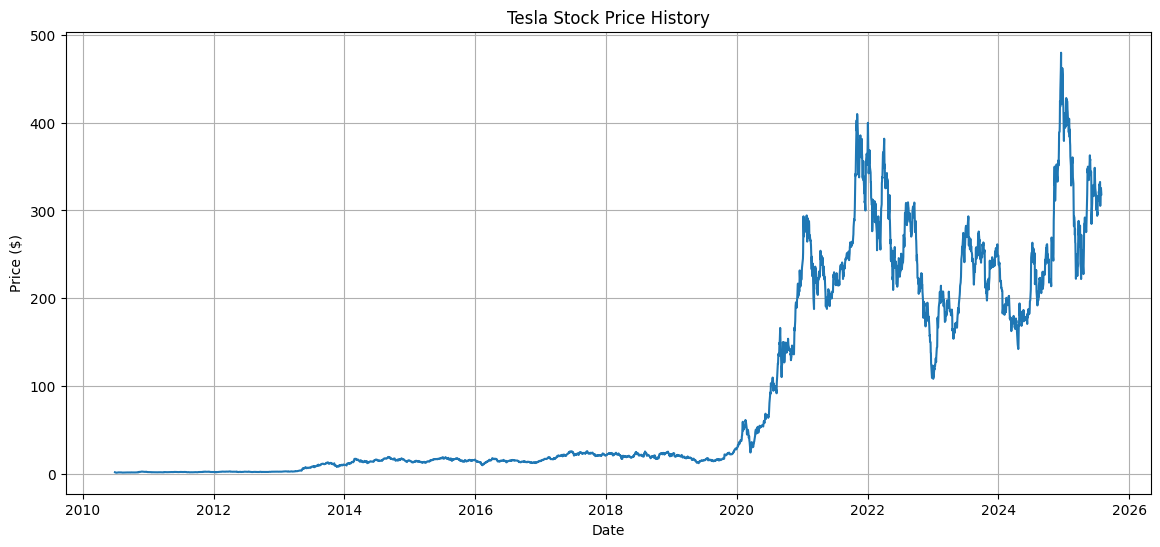

In [6]:
def make_graph(data, title):
    plt.figure(figsize=(14,6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.grid()
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price History')

 ## Question 6: Plot GameStop Stock Graph

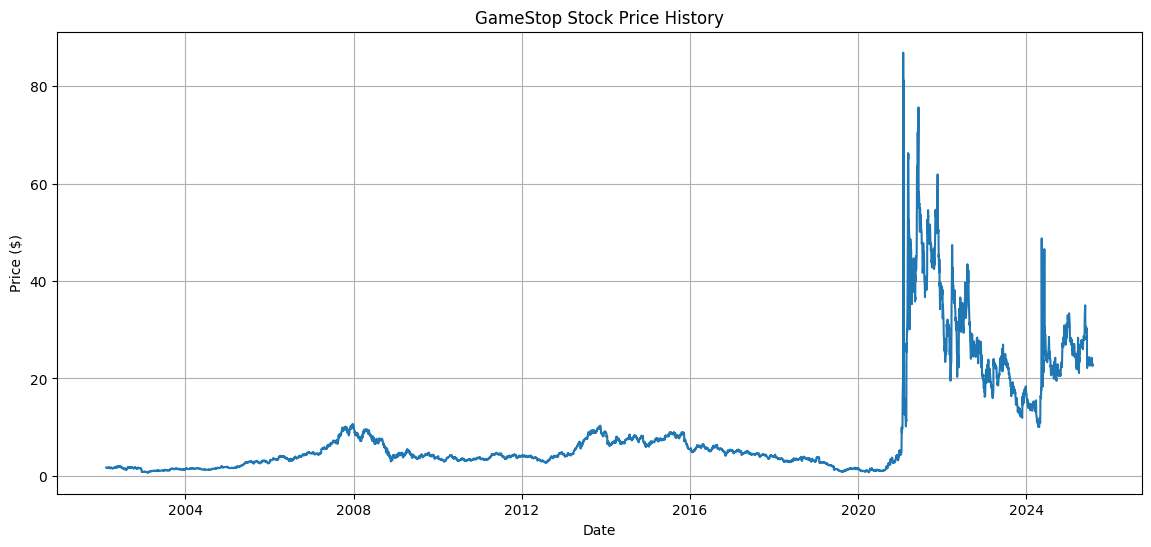

In [7]:
make_graph(gme_data, 'GameStop Stock Price History')